In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [300]:
students_data = pd.read_csv('students-data.csv',sep=';')
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [301]:
students_data.index.name = 'number'
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [109]:
students_data.isnull().sum().sum()

0

No missing values

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [302]:
students_data.select_dtypes(include = 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
school        395 non-null object
sex           395 non-null object
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
dtypes: object(17)
memory usage: 52.5+ KB


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [303]:
students_data.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [304]:
var_less_than_1 = students_data.var() < 1
columns_to_drop = list(var_less_than_1[var_less_than_1 == True].index)
students_data.drop(columns_to_drop, axis=1, inplace=True)
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [305]:
categorical = list(students_data.select_dtypes(include = 'object').columns)
le = LabelEncoder()
for attribute in categorical:
    students_data[attribute] = le.fit_transform(students_data[attribute])

In [306]:
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [307]:
columns = ['G1','G2','G3']
for col in columns:
    students_data[col] = (students_data[col] >= 10).astype(np.uint8)

In [308]:
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [309]:
X = students_data.drop('G3',axis=1)
y = students_data['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

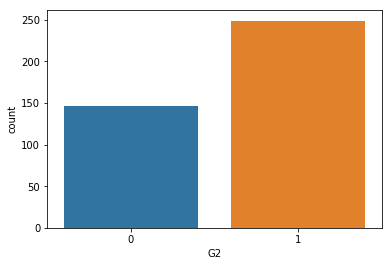

In [310]:
sns.countplot('G2',data=students_data)

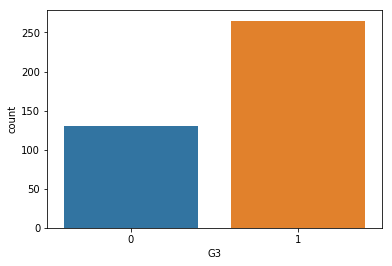

In [311]:
sns.countplot('G3',data=students_data)

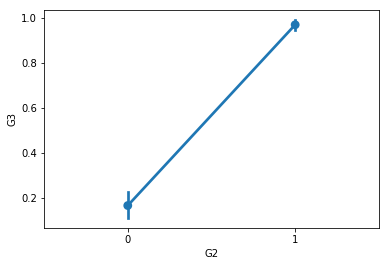

In [312]:
sns.pointplot(x='G2',y='G3',data=students_data)

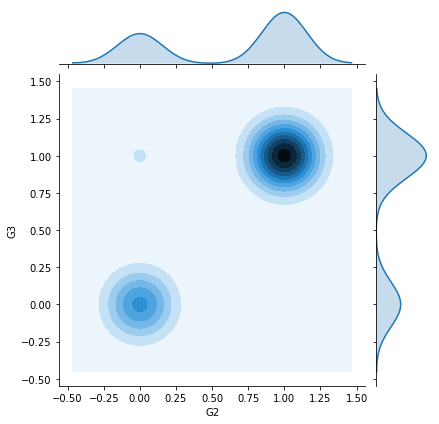

In [313]:
sns.jointplot(x='G2',y='G3',data=students_data,kind='kde')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

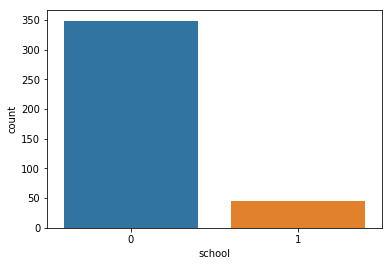

In [314]:
sns.countplot('school',data=students_data)

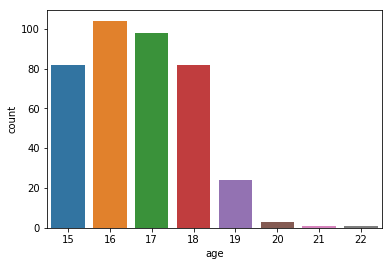

In [315]:
sns.countplot('age',data=students_data)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=300,random_state=0)

In [323]:
len(X_train.index)

300

In [324]:
len(X_test.index)

95

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [325]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)
predicted_train = log_reg.predict(X_train)
predicted_test = log_reg.predict(X_test)

In [326]:
print('Training accuracy score:',accuracy_score(y_train,predicted_train))

Training accuracy score: 0.92


In [327]:
print('Testing accuracy score:',accuracy_score(y_test,predicted_test))

Testing accuracy score: 0.9263157894736842


In [328]:
print('Training f1 score:',f1_score(y_train,predicted_train))

Training f1 score: 0.9405940594059405


In [329]:
print('Testing f1 score:',f1_score(y_test,predicted_test))

Testing f1 score: 0.9391304347826087


# Naive bayes with Iris data

### Import Iris.csv

In [330]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Replacing NaN values with median ###

In [331]:
iris_data[iris_data.isna().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [332]:
iris_data.fillna(iris_data.median(),inplace=True)

### Dropping the Id column###

In [333]:
iris_data = iris_data.drop(columns='Id')

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [334]:
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

### Find the distribution of target variable (Class)

In [335]:
pd.value_counts(iris_data["Species"])

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

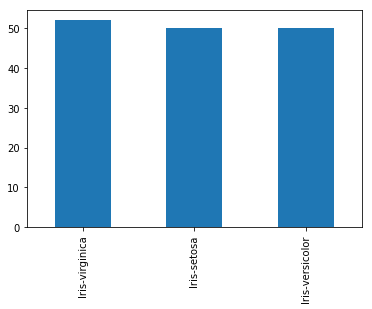

In [336]:
pd.value_counts(iris_data['Species']).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

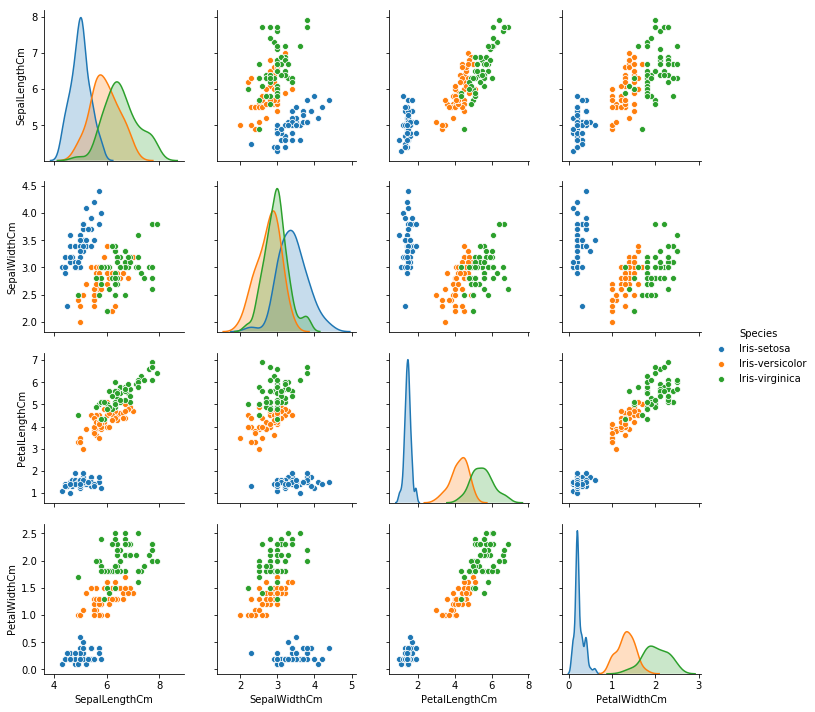

In [337]:
sns.pairplot(iris_data,diag_kind='kde',hue='Species')

**Insights**
From the scatter plots, we can see that:
* Sepal Length tends to increase with Petal Length and Petal Width
* Petal Width increases as Petal Length increases
* Iris-virginica has the highest petal lengths, followed by Iris-versicolor and Iris-setosa

### Summary Statistics and explain insights for at least 2 variables

In [338]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000
mean,5.843421,3.053289,3.766447,1.203289
std,0.822584,0.430757,1.754000,0.759698
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**For Sepal Width:**
* The mean and median are almost equal, implying the distibution is close to normal.
* There are outliers in the lower range of values.

**For Petal Length:**
* The median value is greater than the mean value, implying the distribution is negatively skewed
* Amongst all consecutive quartiles, the difference between the 1st and 2nd quartile is the maximum, implying the values are sparsely distrbuted between these two quartiles


### Correlation among all variables and give your insights

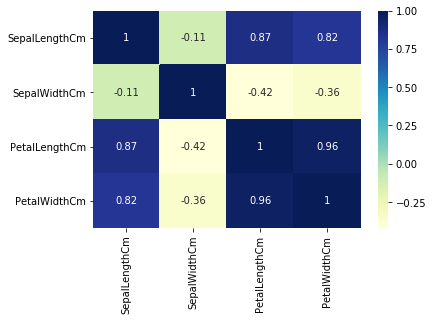

In [341]:
sns.heatmap(iris_data.corr(), annot=True, cmap='YlGnBu')

**Insights**
* There is a very high positive correlation between Petal Length and Petal Width, Sepal Length and Petal Length as well as Sepal Length and Petal Width, implying a directly proportional relationship between these variables
* Sepal Length and Sepal Width have a very low (negative) correlation, meaning they are independent of each other.
* There is also a moderate negative correlation between Petal Length and Sepal Width, implying a slightly inverse relation between these two.

### Split data in Training and Validation in 80:20

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Do Feature Scaling

In [343]:
sc = StandardScaler()
sc.fit(X_train)
sc.transform(X_train)
sc.transform(X_test)

array([[-0.89489827, -1.28165746, -0.41659045, -0.11305869],
       [-0.89489827,  1.75455818, -1.05392594, -1.04277429],
       [ 0.22014088, -1.98232261,  0.16280546, -0.2458752 ],
       [-1.26657798,  0.82033798, -1.05392594, -1.30840732],
       [ 1.5829665 , -0.11388221,  1.26365768,  1.21510646],
       [-1.14268474,  0.11967284, -1.28568431, -1.44122383],
       [ 0.22014088, -0.81454736,  0.80014096,  0.55102389],
       [-1.01879151,  0.82033798, -1.28568431, -1.30840732],
       [-0.15153884, -1.28165746,  0.74220137,  1.08228995],
       [ 0.71571383,  0.35322788,  0.45250341,  0.41820737],
       [-1.01879151,  1.05389303, -1.40156349, -1.1755908 ],
       [ 0.34403412, -0.11388221,  0.68426178,  0.81665692],
       [ 0.59182059, -0.58099231,  0.80014096,  0.41820737],
       [-1.01879151,  0.82033798, -1.22774472, -1.04277429],
       [-0.0276456 , -0.81454736,  0.80014096,  0.94947343],
       [ 0.09624764, -0.11388221,  0.80014096,  0.81665692],
       [ 1.08739355, -1.

### Train and Fit NaiveBayes Model

In [344]:
gnb = GaussianNB()

In [345]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

#### For Train Set####

In [346]:
predicted_train = gnb.predict(X_train)
print('Training Accuracy:',accuracy_score(y_train,predicted_train))

Training Accuracy: 0.9421487603305785


[Text(0, 0.5, 'Iris-setosa'),
 Text(0, 1.5, 'Iris-versicolor'),
 Text(0, 2.5, 'Iris-virginica')]

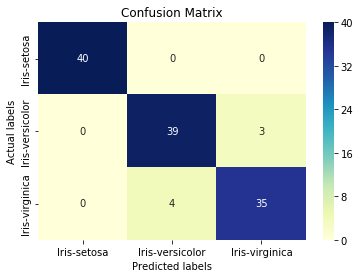

In [347]:
iris_classes = list(y.unique())
cm = confusion_matrix(y_train,predicted_train,labels=iris_classes)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu")

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.xaxis.set_ticklabels(iris_classes,ha='center')
ax.yaxis.set_ticklabels(iris_classes,va='center')

**Conclusions**
* For Iris-setosa, all the examples were correctly classified
* For Iris-versicolor, 3 examples were incorrectly classified as Iris-verginica. Rest were correctly classified
* For Iris-virginica, 4 examples were incorrectly classified as Iris-versicolor. Rest were correctly classified

#### For Test Set ####

In [348]:
predicted_test = gnb.predict(X_test)
print('Testing Accuracy:',accuracy_score(y_test,predicted_test))

Testing Accuracy: 0.967741935483871


[Text(0, 0.5, 'Iris-setosa'),
 Text(0, 1.5, 'Iris-versicolor'),
 Text(0, 2.5, 'Iris-virginica')]

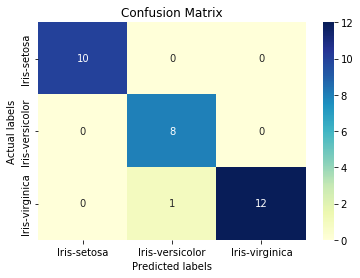

In [349]:
iris_classes = list(y.unique())
cm = confusion_matrix(y_test,predicted_test,labels=iris_classes)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu")

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.xaxis.set_ticklabels(iris_classes,ha='center')
ax.yaxis.set_ticklabels(iris_classes,va='center')

**Conclusions**
* For Iris-setosa, all the examples were correctly classified
* For Iris-versicolor, all the examples correctly classified
* For Iris-virginica, 1 example were incorrectly classified as Iris-versicolor. Rest were correctly classified